# Aplicando na prática

Best Subset Features: (0, 1, 4)
Ridge Regression R^2: 0.9824142982898171
Lasso Regression R^2: 0.9824311576332418
Lasso Coefficients: [ 2.91215506 -1.38063015  0.          0.          1.91226985]
PCA Regression R^2: 0.10258634155447499


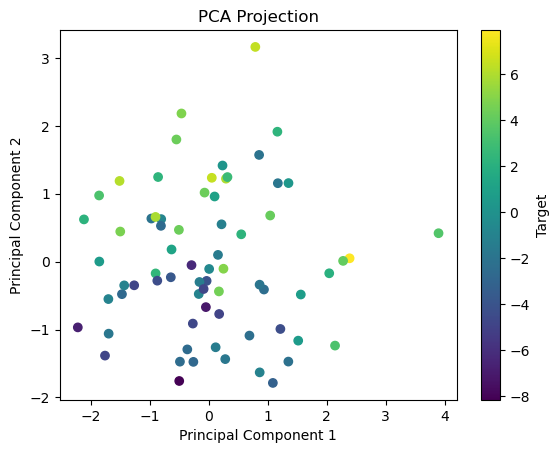

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
import matplotlib.pyplot as plt

# Simulando um dataset
np.random.seed(42)
n, p = 100, 5  # n = número de observações, p = número de preditores
X = np.random.randn(n, p)
coef = np.array([3, -1.5, 0, 0, 2])  # Somente algumas variáveis têm relação com Y
y = X @ coef + np.random.randn(n) * 0.5

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Subset Selection ---
def best_subset_selection(X, y, max_features=None):
    max_features = max_features or X.shape[1]
    best_model = None
    best_score = -np.inf
    for k in range(1, max_features + 1):
        for subset in combinations(range(X.shape[1]), k):
            X_subset = X[:, subset]
            model = LinearRegression().fit(X_subset, y)
            score = r2_score(y, model.predict(X_subset))
            if score > best_score:
                best_score = score
                best_model = (model, subset)
    return best_model

best_model, best_features = best_subset_selection(X_train, y_train, max_features=3)
print("Best Subset Features:", best_features)

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, ridge_pred))

# --- Lasso Regression ---
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, lasso_pred))
print("Lasso Coefficients:", lasso.coef_)

# --- Principal Component Analysis (PCA) ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)
pca_pred = pca_model.predict(X_test_pca)
print("PCA Regression R^2:", r2_score(y_test, pca_pred))

# Visualizando PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Target')
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
